# EDA and Metadata Analysis

### 1. Checking Image Sizes

In [34]:
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [35]:
folder_path = Path("../Biomass_data/train")
images = []

for file_path in folder_path.glob('*'):
    img = cv2.imread(str(file_path)) 

    if img is not None:
        images.append(img)
    
    

print(f"Loaded {len(images)} images.")

Loaded 357 images.


In [36]:
images = np.array(images)
shape = images.shape
print(shape)


(357, 1000, 2000, 3)


Every image has the same size (1000 x 2000).

### 2. Checking lighting condition 

In [29]:
array_brightness = []

def check_brightness(images): 
    for img in images : 

        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        avg_brightness = np.mean(v)
        array_brightness.append(avg_brightness)

check_brightness(images)


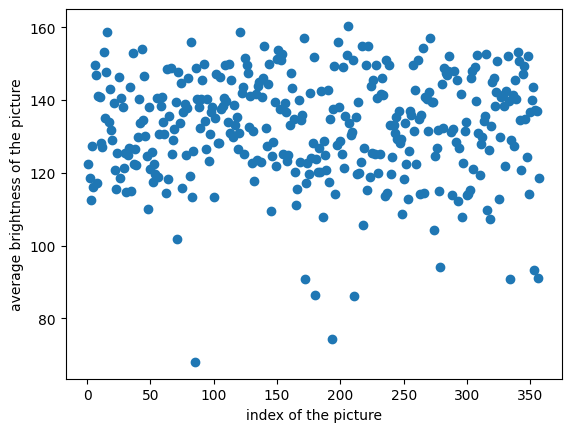

In [30]:
x = range(1,358)
y = array_brightness
plt.scatter(x , y )
plt.xlabel("index of the picture")
plt.ylabel("average brightness of the picture")
plt.show()

There are some pictures that are too dim and look like outliers, so I decided to remove those with an average brightness less than 100.

In [31]:
for brightness in array_brightness : 
    if brightness < 100 : 
        array_brightness.remove(brightness)

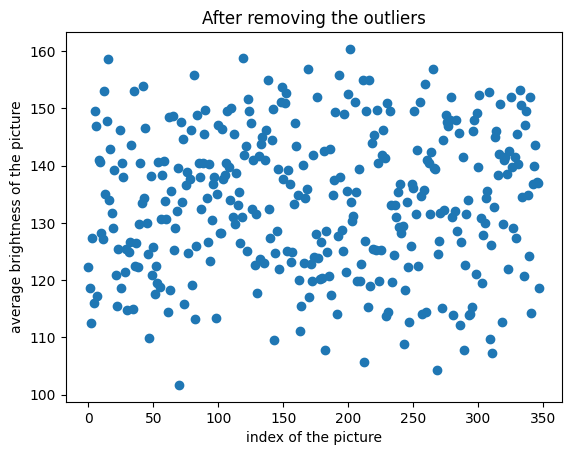

In [38]:
x = range(0,len(array_brightness))
y = array_brightness
plt.scatter(x , y )
plt.title("After removing the outliers")
plt.xlabel("index of the picture")
plt.ylabel("average brightness of the picture")
plt.show()